<a href="https://colab.research.google.com/github/marcusdasilva96/StudentPerformance/blob/master/Final_Project_Student_Performance_in_Exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance in Exams 

![img](https://www.gpbnews.org/sites/wjsp/files/styles/x_large/public/201611/graduation-liftedbydata_slide-271e09a2737b0ad490a15c1be7fb62c67837ed63-s1600-c85.jpg)

Dataset can be obtained [here](https://www.kaggle.com/spscientist/students-performance-in-exams).

#### Scores secured by students in three core subjects: math, reading and writing.

*  What type of student tend to have better grades?
*  What could have possibly impacted their performance?




#### Getting the dataset ready to be analyzed:



In [74]:
# import the data CSV as dataframe and modules needed
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# set the plots to display in the Jupyter notebook
%matplotlib inline

# set graph style for better visualization
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = (14)

df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Manipulating data for convenience and better usability:

In [75]:
# give a name to the dataframe for convenience
df = pd.read_csv('StudentsPerformance.csv')

# remove race/ethnicity since data is inconclusive
df2 = df.drop('race/ethnicity', axis=1)

# add new column with average of all scores
df2['average score'] = ((df2['math score'] + df2['reading score'] + df2['writing score'])/3)

df2.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,bachelor's degree,standard,none,72,72,74,72.666667
1,female,some college,standard,completed,69,90,88,82.333333
2,female,master's degree,standard,none,90,95,93,92.666667
3,male,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,some college,standard,none,76,78,75,76.333333


#### Details of my dataset:




In [76]:
# how many rows and what are the columns after the changes?
print(f'Rows: {len(df2)}')
print(f'Columns: {len(df2.columns)}')
cols = df2.columns
for i, col in enumerate(cols):
  print(i+1, col)
print()

Rows: 1000
Columns: 8
1 gender
2 parental level of education
3 lunch
4 test preparation course
5 math score
6 reading score
7 writing score
8 average score



*   The dataset consists of one thousand rows, representing individual student entries, and eight unique columns that differentiate each row.
*   The last column was added for better analysis of individual's average scores across all subjects.

female    518
male      482
Name: gender, dtype: int64
female    0.518
male      0.482
Name: gender, dtype: float64

AxesSubplot(0.260833,0.125;0.503333x0.755)


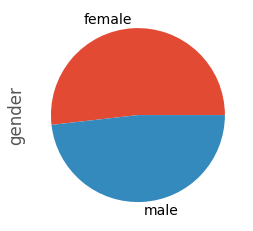

In [77]:
# what's the distribution between male and female? numbers and percentage?
print(df['gender'].value_counts())
print(df['gender'].value_counts(normalize=True))
print()

# graphical representation
print(df2['gender'].value_counts().plot(kind="pie"))

*   The population is fairly distributed, being 52% female students (518) and 48% male students (482) -- not a biased example.


#### How did they score in the test?



In [78]:
# describe the scores of the overal population
print(df2.describe()) 
# if no column is mentioned, it will automatically bring up only the columns with ints

       math score  reading score  writing score  average score
count  1000.00000    1000.000000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000      67.770667
std      15.16308      14.600192      15.195657      14.257326
min       0.00000      17.000000      10.000000       9.000000
25%      57.00000      59.000000      57.750000      58.333333
50%      66.00000      70.000000      69.000000      68.333333
75%      77.00000      79.000000      79.000000      77.666667
max     100.00000     100.000000     100.000000     100.000000


*   Students generally scored a little better on reading and writing than on math (naturally).
*   The average score of the overal population across all subjects wasn't so satisfactory given that the average score was below 70%.

gender
female    69.569498
male      65.837483
Name: average score, dtype: float64

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

gender
female    72.608108
male      65.473029
Name: reading score, dtype: float64

gender
female    72.467181
male      63.311203
Name: writing score, dtype: float64

---

female    0.513966
male      0.486034
Name: gender, dtype: float64

female    0.559322
male      0.440678
Name: gender, dtype: float64



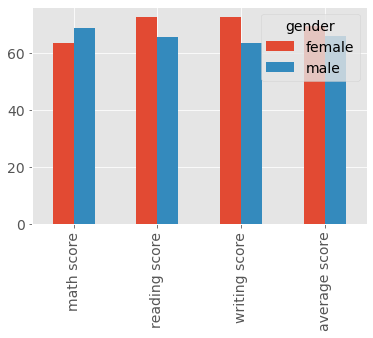

In [79]:
#  who scored better: male or female?
print(df2.groupby('gender')['average score'].mean())
print()
print(df2.groupby('gender')['math score'].mean())
print()
print(df2.groupby('gender')['reading score'].mean())
print()
print(df2.groupby('gender')['writing score'].mean())
print()
print('---')
print()

# ok but maybe females had better backgrounds and influences... so what's the percentage of male and female who have completed test preparation courses?
df3 = df2[df2['test preparation course']=='completed']
print(df3['gender'].value_counts(normalize=True))
print()

# what's the percentage of male and female whose parent's have at least a bachelor's degree?
education_levels = ["master's degree", "bachelor's degree"]
df3 = df2[df2['parental level of education'].isin(education_levels)]
print(df3['gender'].value_counts(normalize=True))
print()

# graphical representation 
df3 = df2.groupby('gender')['math score', 'reading score', 'writing score', 'average score'].mean()
df3 = df3.transpose()
df3.plot.bar()

*   Females scored better overall while males outperformed in math.
*   The female population had the highest score in reading, while males had the highest score in math.
*   However, among females, there was a higher percent of students who both completed a test preparation course *and* their parents were highly educated.

#### What are some of the influences that could have affected these scores?


In [80]:
# what are the parent's different levels of education?
print(df2['parental level of education'].value_counts())
print()

# what are the average scores by parental level of education?
print(df2.groupby('parental level of education')['average score'].mean().sort_values(ascending=False))
print()

# what are the average scores based of preparedness?
print(df2.groupby('test preparation course')['average score'].mean().sort_values(ascending=False))
print()

# what about students that have done a course + their parents are highly educated?
education_levels = ["master's degree", "bachelor's degree"]
df3 = df2[(df2['test preparation course']=='completed') & (df2['parental level of education'].isin(education_levels))]
print(df3['average score'].mean())

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

parental level of education
master's degree       73.598870
bachelor's degree     71.923729
associate's degree    69.569069
some college          68.476401
some high school      65.108007
high school           63.096939
Name: average score, dtype: float64

test preparation course
completed    72.669460
none         65.038941
Name: average score, dtype: float64

76.26262626262624


*   Students whose parents had the highest levels of education scored higher.
*   Not surprisingly, those who completed a test preparation course achieved higher marks.
*   And those whose parents are highly educated *and* completed a preparation course had the highest average across all subjects.


#### Are there any students who scored perfectly in all three sections?


In [81]:
# how many students scored 100 in all sections?
print(df2[df2["average score"] == 100]['average score'].count())

# what can we say about them?
df2[df2["average score"] == 100]

3


,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
458,female,bachelor's degree,standard,none,100,100,100,100.0
916,male,bachelor's degree,standard,completed,100,100,100,100.0
962,female,associate's degree,standard,none,100,100,100,100.0


*   Three students had a perfect score.
*   All of them had parent's with at least an associate's degree.
*   None had reduced fare lunch, which implies they weren't in low income families.
*   Interestingly, the only male who had a perfect mark was the only one to complete a test preparation course.
